## Juan David Galan Vargas - 202111470
# Muestra de entrenamiento de Cumulos con GAIA DR3, Hunt 2023

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
archivo = 'catalogo.csv'
df = pd.read_csv(archivo)
columnas=df.columns

In [3]:
df.head()

,Name,ID,GaiaDR3,inrt,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,Gmag,BPmag,RPmag,RV,_RA_icrs,_DE_icrs
0,HSC_1313,2856,4916260085635456,0,1.000000,41.237325,3.957881,10.64,-12.34,1.519,20.044415,20.879393,19.119940,NaN,41.237278,3.957936
1,HSC_1313,2856,4965330087149056,0,1.000000,42.615000,4.089997,10.85,-12.88,1.459,17.527039,18.348484,16.187153,NaN,42.614952,4.090055
2,HSC_1313,2856,5047892243245696,1,1.000000,42.328928,4.533813,11.09,-11.88,1.500,18.013546,19.221575,16.898410,NaN,42.328878,4.533866
3,HSC_1313,2856,5454303523876608,0,0.942448,42.968331,4.856946,10.59,-13.99,1.427,17.077087,18.034590,16.120436,NaN,42.968284,4.857008
4,HSC_1313,2856,5496492987454208,0,0.967269,43.557567,4.985608,10.61,-12.10,1.490,17.686493,18.710737,16.697807,NaN,43.557520,4.985662


In [4]:
columns_to_drop = ['ID',"GaiaDR3","inrt","RV", '_RA_icrs',"_DE_icrs"] 
df = df.drop(columns=columns_to_drop)
df.head()



,Name,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,Gmag,BPmag,RPmag
0,HSC_1313,1.000000,41.237325,3.957881,10.64,-12.34,1.519,20.044415,20.879393,19.119940
1,HSC_1313,1.000000,42.615000,4.089997,10.85,-12.88,1.459,17.527039,18.348484,16.187153
2,HSC_1313,1.000000,42.328928,4.533813,11.09,-11.88,1.500,18.013546,19.221575,16.898410
3,HSC_1313,0.942448,42.968331,4.856946,10.59,-13.99,1.427,17.077087,18.034590,16.120436
4,HSC_1313,0.967269,43.557567,4.985608,10.61,-12.10,1.490,17.686493,18.710737,16.697807


In [5]:
name_dataframes = {}
for name in df['Name'].unique():
    name_df = df[df['Name'] == name]
    name_dataframes[name] = name_df


In [6]:
nombres_cumulos=name_dataframes.keys()
print(len(nombres_cumulos))
nombres_cumulos=list(nombres_cumulos)
print(nombres_cumulos)

7167
['HSC_1313', 'HSC_1438', 'Melotte_25', 'HSC_1437', 'HSC_1580', 'HSC_1373', 'HSC_1288', 'HSC_1369', 'HSC_1630', 'Melotte_22', 'HSC_1340', 'HSC_1390', 'OCSN_50', 'HSC_1346', 'HSC_1355', 'Alessi-Teutsch_10', 'HSC_1195', 'HSC_1238', 'UPK_303', 'HSC_1250', 'NGC_1333', 'Alessi-Teutsch_9', 'HSC_1147', 'NGC_752', 'HSC_1155', 'HSC_1176', 'UPK_305', 'Theia_71', 'NGC_1647', 'HSC_1394', 'CWNU_1129', 'Theia_7', 'HSC_1481', 'CWNU_52', 'HSC_1368', 'UBC_199', 'HSC_1318', 'HSC_1403', 'Czernik_19', 'Theia_54', 'Theia_93', 'HSC_1347', 'Skiff_J0507+30.8', 'OC_0290', 'FSR_0771', 'HSC_1314', 'Palomar_2', 'HSC_1326', 'OC_0289', 'CWNU_1317', 'HSC_1293', 'OC_0279', 'OC_0280', 'IC_348', 'UBC_4', 'Czernik_18', 'NGC_1579', 'HSC_1291', 'COIN-Gaia_11', 'HSC_1271', 'FSR_0728', 'UBC_1272', 'Alessi_96', 'COIN-Gaia_10', 'HSC_1268', 'HSC_1270', 'COIN-Gaia_20', 'HSC_1361', 'Dolidze_16', 'Berkeley_69', 'Theia_780', 'HXWHB_8', 'HSC_1359', 'Gulliver_54', 'NGC_1893', 'UBC_1282', 'HSC_1353', 'HSC_1345', 'HSC_1343', 'UBC_

C:\Users\juang\AppData\Local\Temp/ipykernel_3508/2125969234.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


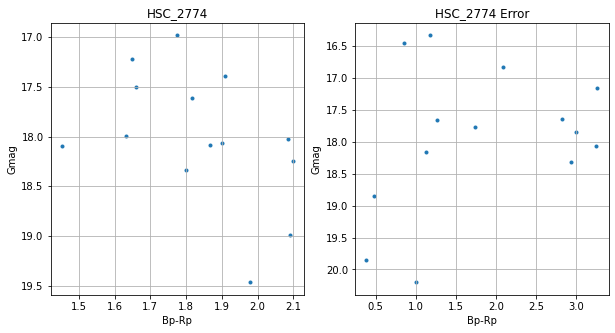

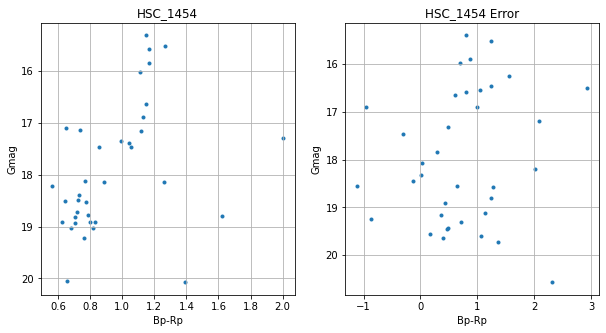

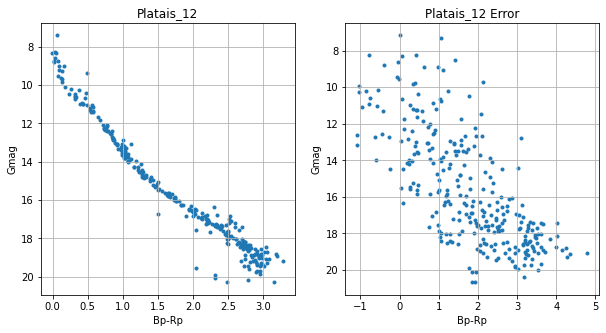

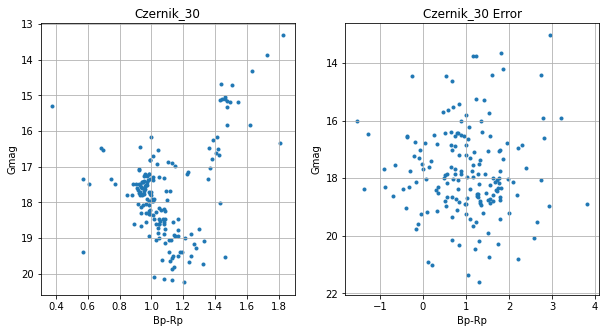

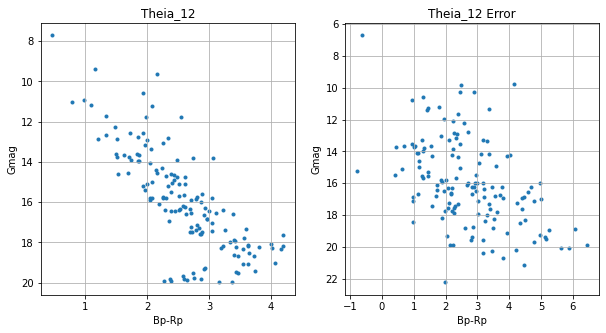

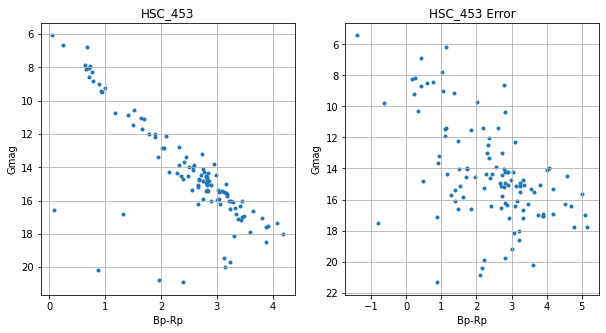

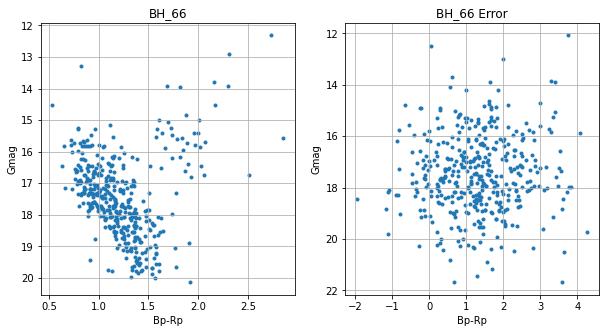

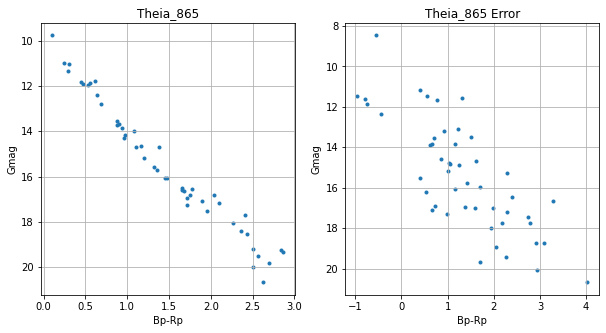

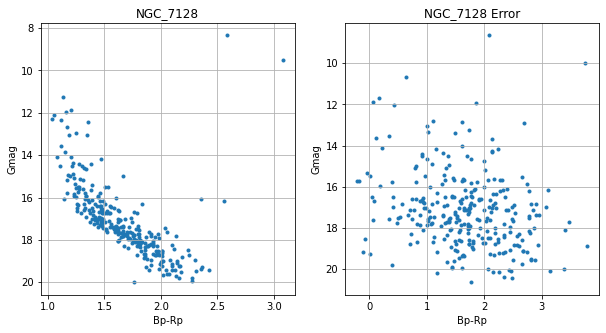

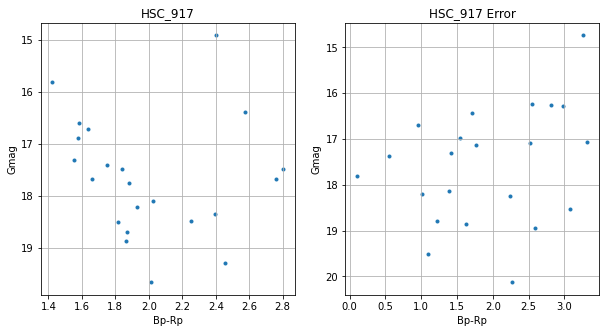

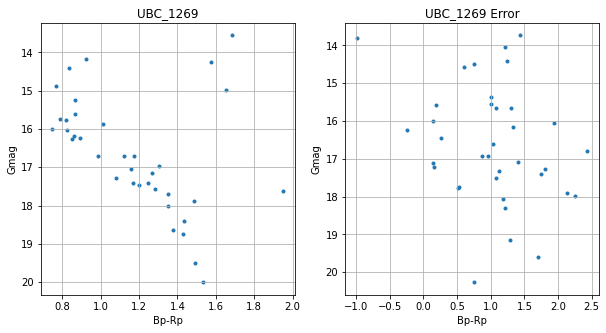

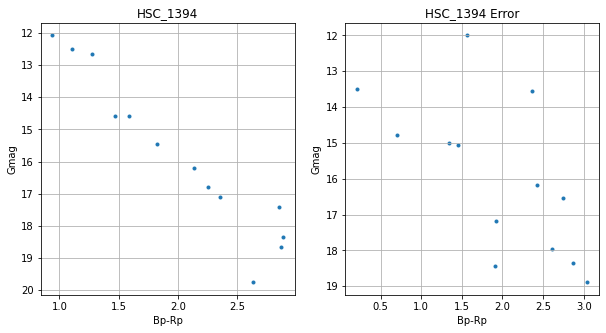

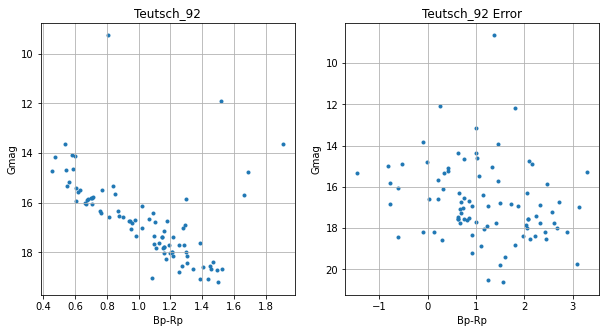

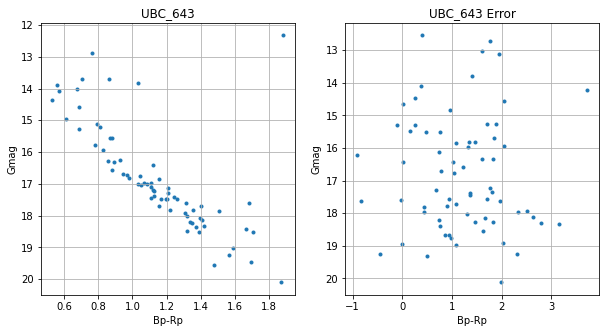

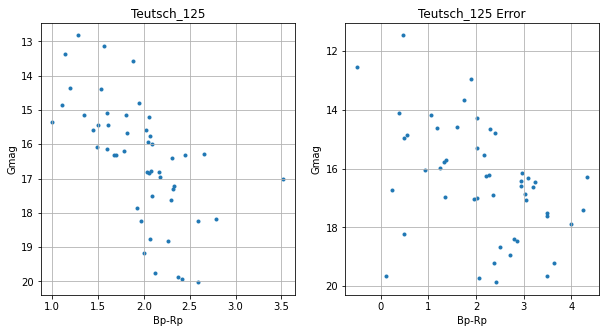

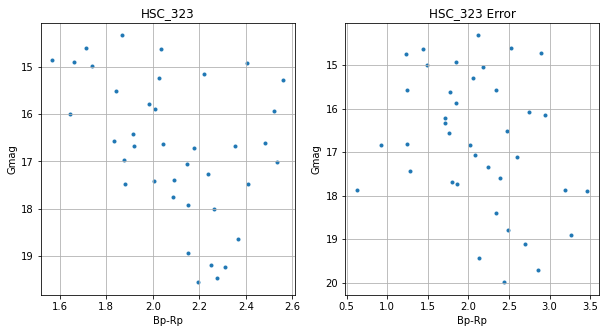

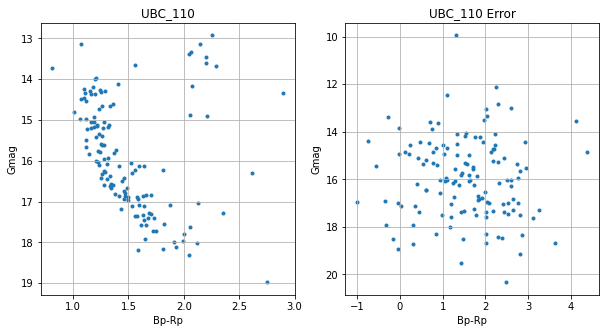

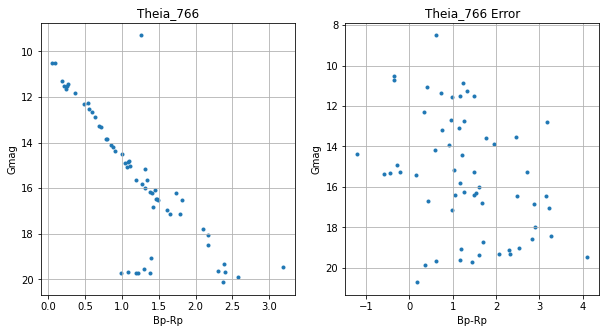

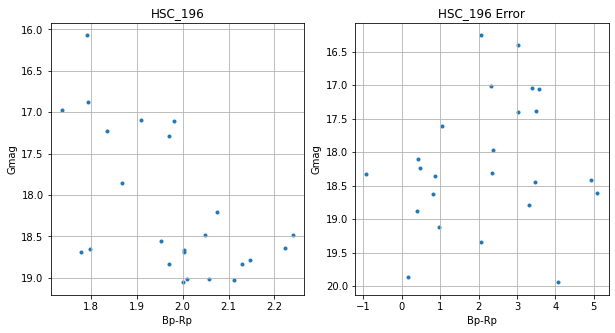

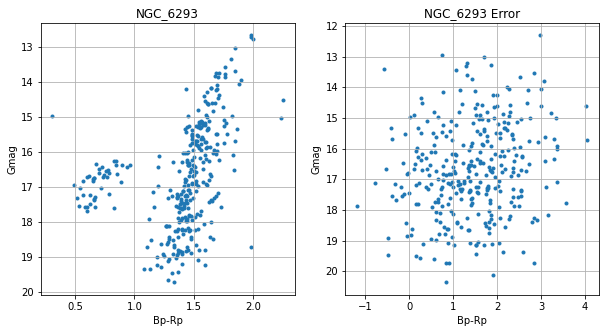

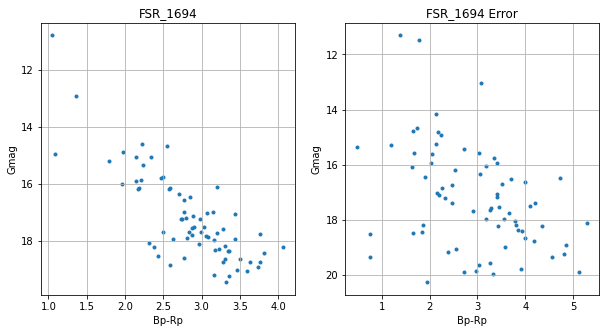

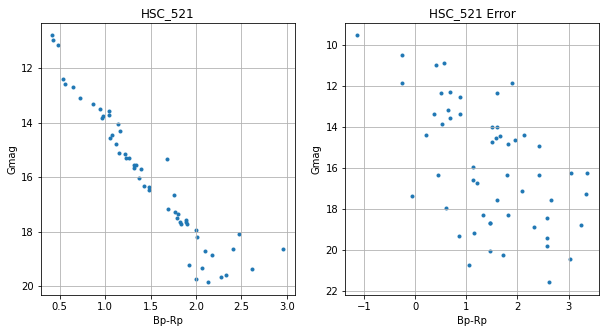

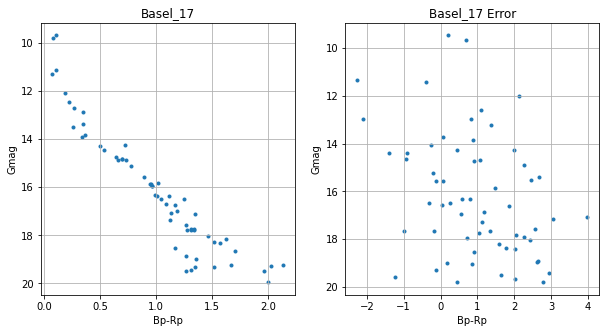

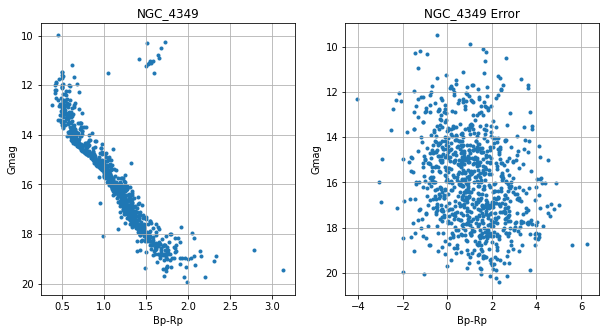

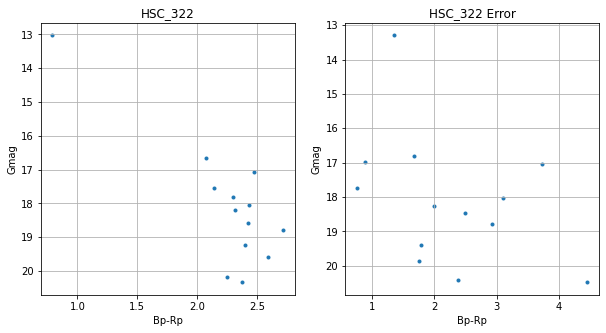

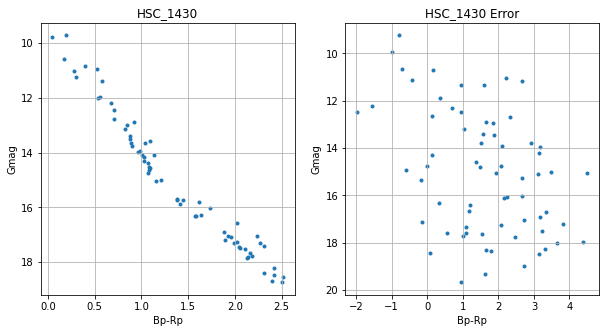

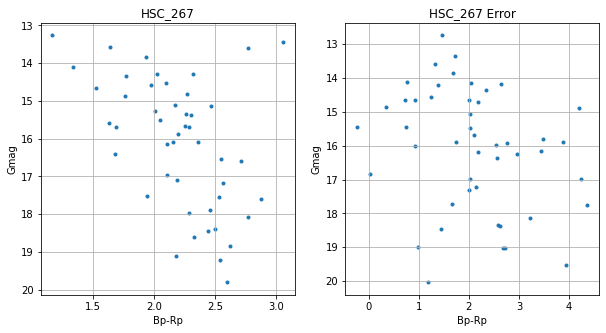

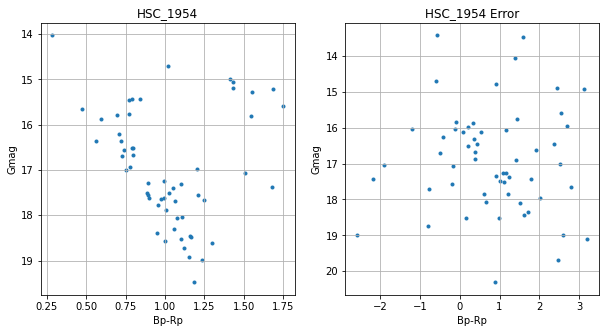

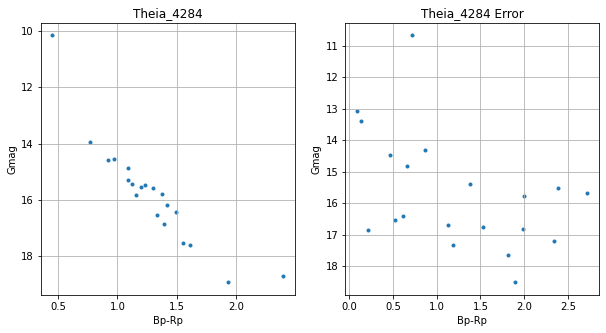

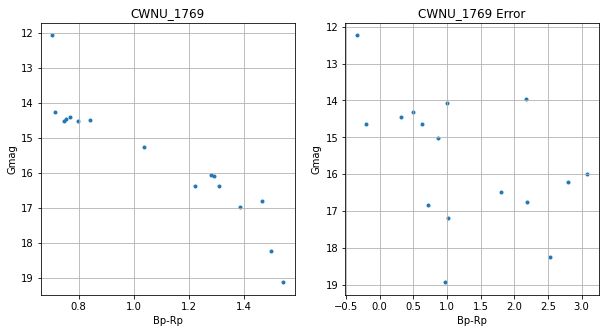

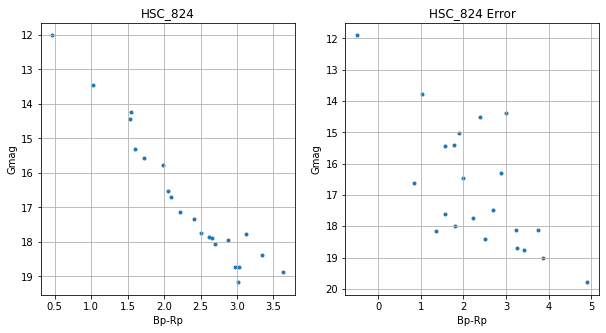

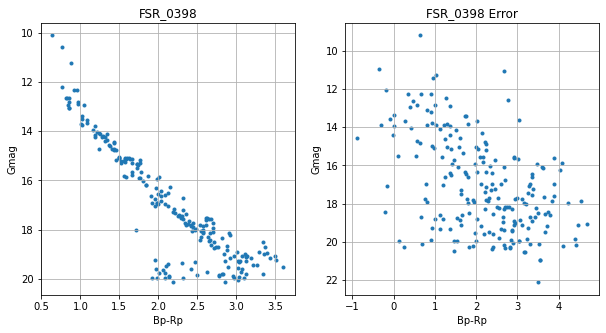

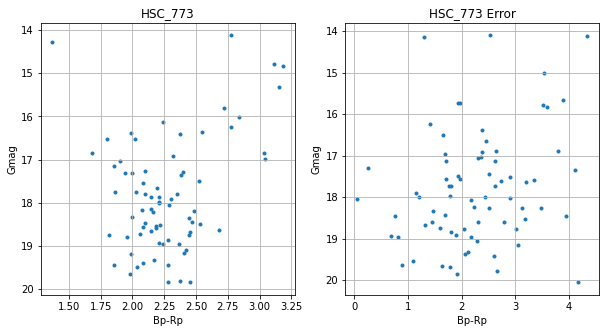

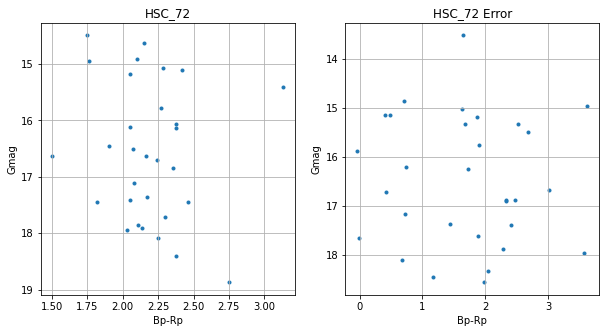

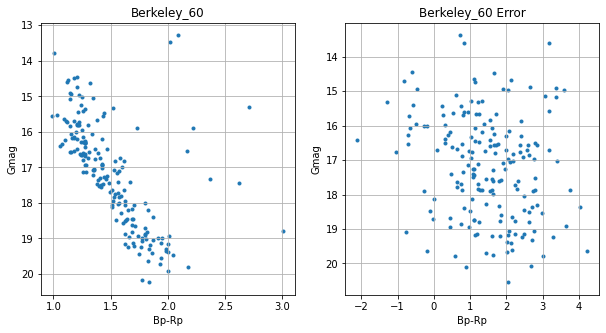

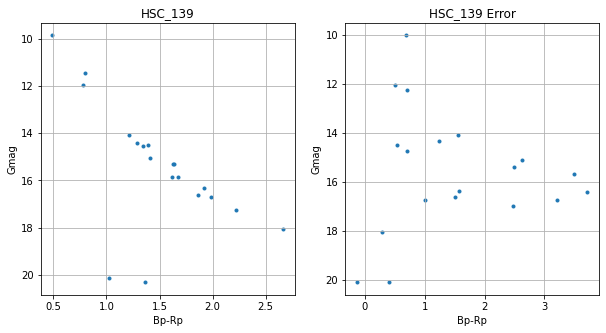

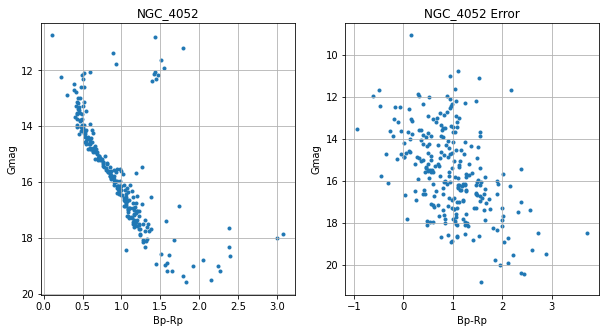

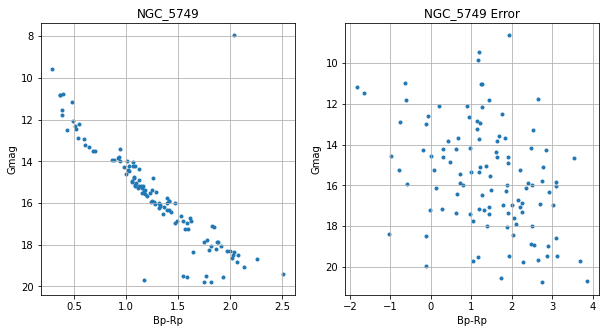

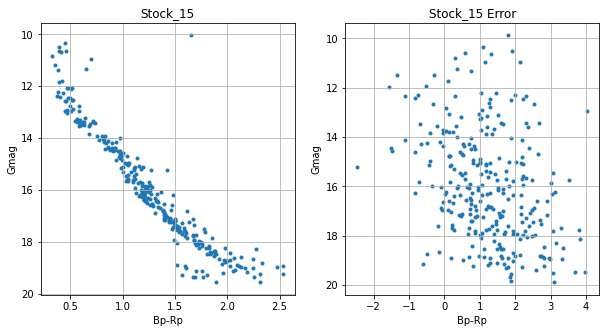

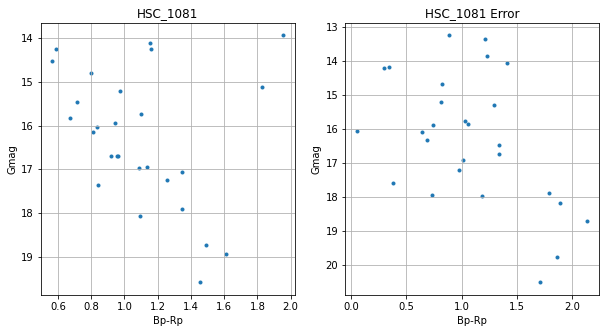

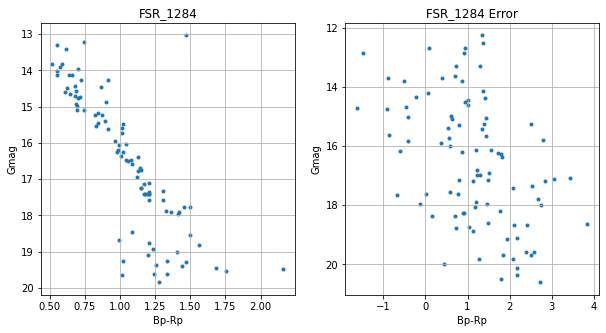

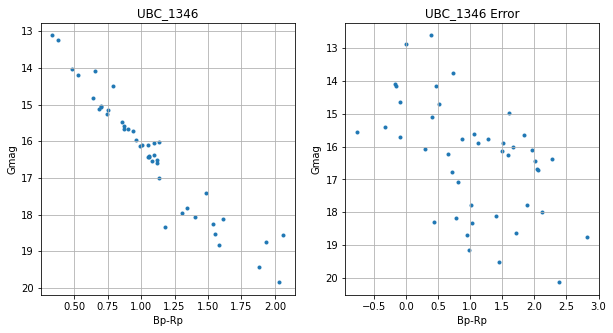

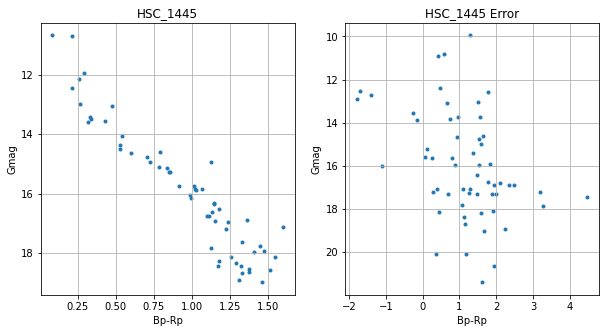

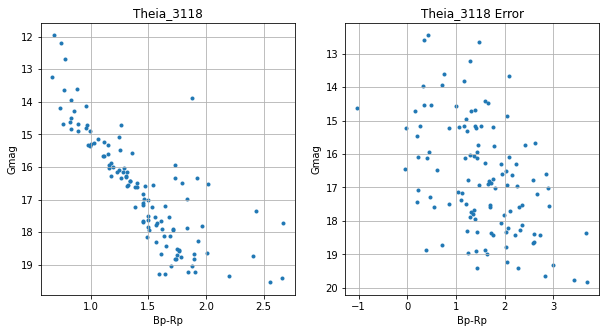

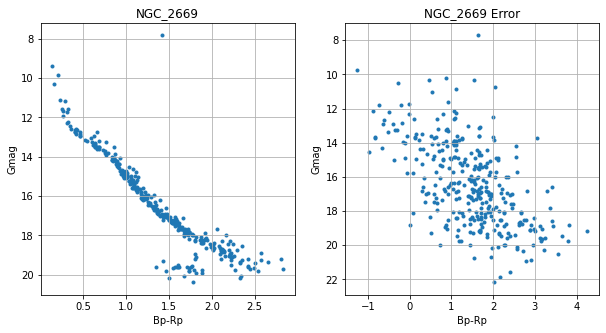

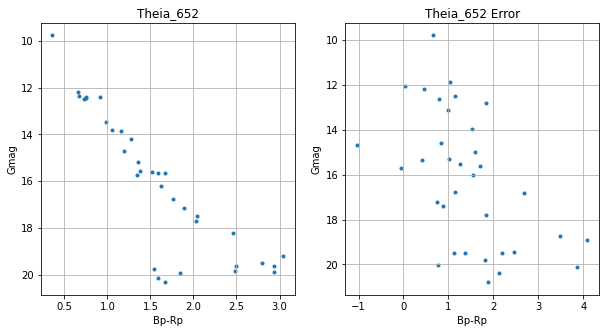

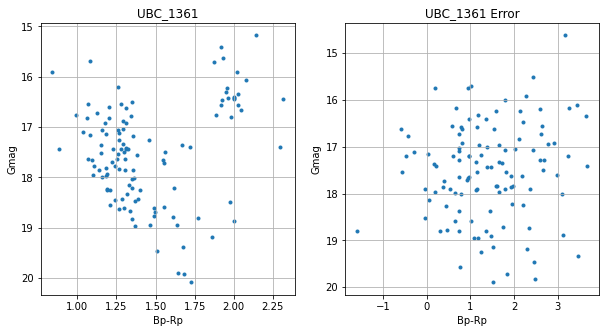

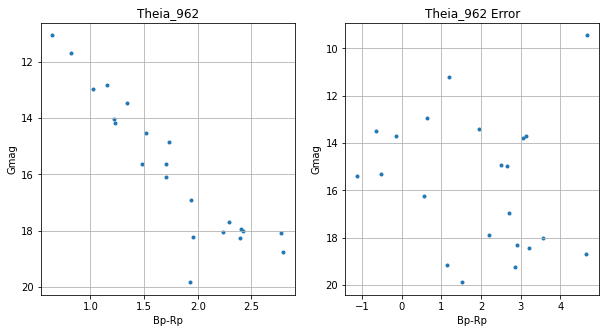

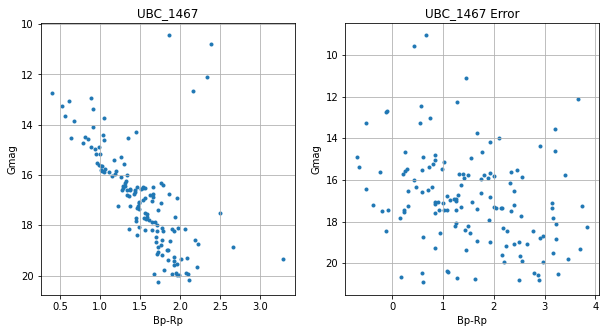

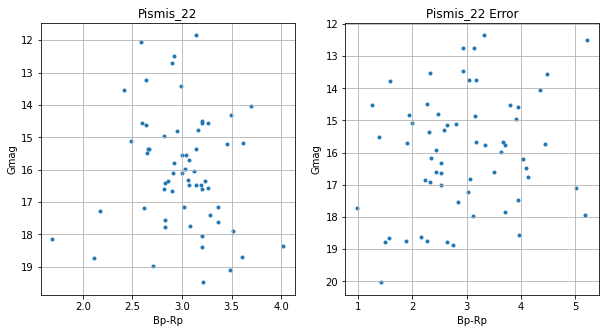

In [18]:

def graficar(nombre):
    df1=name_dataframes[nombre]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.scatter(df1["BPmag"]-df1["RPmag"],df1["Gmag"],marker=".")
    ax1.grid(True)
    ax1.set_xlabel("Bp-Rp")
    ax1.set_ylabel("Gmag")
    ax1.set_title(nombre)
    ax1.invert_yaxis()
    
    df2=df1.copy()
    columns_to_add_noise = ["BPmag", "RPmag", "Gmag"]

    noise_level = 0.5  # desviacion estandar
    variacion=np.linspace(-0.2,0.5,100)
    for col in columns_to_add_noise:
        if col in df1.columns and pd.api.types.is_numeric_dtype(df2[col]):
            noise = np.random.normal(0, noise_level+random.choice(variacion), df2[col].shape)
            #noise=np.random.binomial(0, noise_level, df2[col].shape)
            
            df2[col] = df2[col] + noise

    ax2.scatter(df2["BPmag"]-df2["RPmag"],df2["Gmag"],marker=".")
    ax2.grid(True)
    ax2.set_xlabel("Bp-Rp")
    ax2.set_ylabel("Gmag")
    ax2.set_title(nombre+" Error")
    ax2.invert_yaxis()

for i in range(50):
    graficar(random.choice(nombres_cumulos))
    i+=1
#graficar('UBC_378')
#graficar('HSC_2964')
#graficar("NGC_6425")